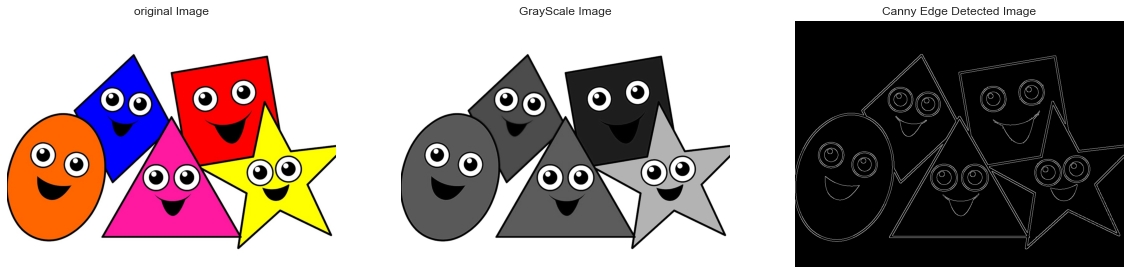

In [1]:
#Canny Edge detection
import cv2
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

loaded_image = cv2.imread("animate.jpeg")
loaded_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)

edged_image = cv2.Canny(gray_image, threshold1=30, threshold2=100)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image, cmap="gray")
plt.title("original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detected Image")
plt.show()

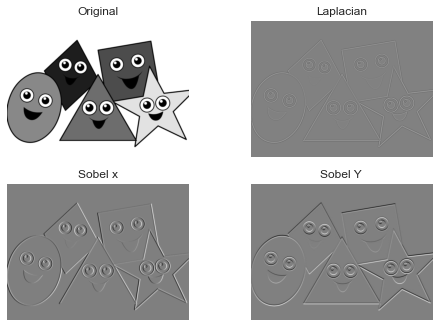

In [2]:
#Laplacian and Sobel Edge detecting methods
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Loading image
#imge = cv2.imread('SanFrancisco.jpg',) 
img0= cv2.imread('animate.jpeg',)
                 
#converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
                 
# remove noise
img = cv2.GaussianBlur(gray, (3,3),0)
                 
#convolute with proper kernels
laplacian = cv2.Laplacian (img,cv2.CV_64F)
sobelx = cv2.Sobel (img,cv2.CV_64F,1,0,ksize=5) #x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) #y

plt.subplot(2,2,1), plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
#Edge detection using prewitt operator
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('animate.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur (gray, (3,3),0)

#prewitt
kernelx = np.array([[1,1,1], [0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx) 
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

cv2.imshow("Original Image", img)
cv2.imshow("Prewitt x", img_prewittx)
cv2.imshow("Prewitt y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#import cv2
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
roberts_cross_v = np.array([[1, 0],
                            [0,-1 ]] )
roberts_cross_h= np.array([[0, 1],
                           [-1, 0 ]] )
img = cv2.imread("animate.jpeg",0).astype('float64')
img/=255.0
vertical =ndimage.convolve( img, roberts_cross_v )
horizontal=ndimage.convolve( img, roberts_cross_h)

edged_img = np.sqrt( np.square (horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)
cv2.imshow("OutputImage", edged_img)
cv2.waitKey()
cv2.destroyAllWindows()